# <center>                                        Kickstarter Analysis                                </center>


## Team Members:

Tay Kai Yang<br>
Wong Wei Zhi<br>
Lim Jun Wei<br><br>
Class: Sat 3:45pm<br>

### Data Sources:

**CSV File used** - 'ks-projects-201801.csv' <br>
**Structure**   - CSV file <br>
**Obtained from** - https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv (Retrieved on 30 Jan 2019)

**CSV File used** - 'google-trends-kickstartersearch' <br>
**Structure**     - CSV File <br>
**Obtained from** - Google Trends, Search term: kickstarter, Location: Singapore, Date: 1/8/2016 to 1/2/2018 <br>
                    Weblink : https://trends.google.com/trends/explore?date=2016-01-08%202018-01-01&geo=SG&q=%2Fm%2F0bwhy_7   <br>                      (Retrieved on 15 Feb 2019)


## Executive Summary:

In recent years, there has been an increase in the number of successful kickstarter projects in Singapore. As there are various factor that could have caused this increase, our aim in this project was to identify whether the increase in success rate could be related to the number of google searches which include the term 'kickstarter'. Through our findings, we identify that there is a mild correlation between the two variables. However, as the correlation is a weak one, this implies that our area of focus is unlikely to be a large contributer to the success of kickstarter projects. Thus, we recommended a few other possible options to expand our projects on in order to identify the reasons for the increase of success rate in for kickstarter projects in Singapore. 

On a side note, during the initial phase of data exploration, we have noted some discoveries as mentioned below.

**1)** To investigate the success rate vs goal set (Overall)

**2)** To investigate success rate based on country

**3)** To investigate success rate vs duration of crowdfunding

**4)** Percentage of projects in each category vs their success rates

Even though we managed to see the trend for these comparison, we were unable to draw any conclusive statement for these graphs as more data are required. The graphs were kept for future references regarding any related efforts to be made towards this project.

### Columns:
[Kickstarter Projects] <br>
**ID**                _(of project)_ <br>
**name**              _(of project)_ <br>
**category**          _(of project)_ <br>
**main_category**     _(of project)_ <br>
**currency**          _(Currency the project is dealing with)_ <br>
**deadline**          _(For crowdfunding)_ <br>
**goal**              _(Goal amount in project currency)_ <br>
**launched**          _(date project was launched)_ <br>
**pledged**           _(Pledged amount in the project currency)_ <br>
**state**             _(of project: failed, successful, canceled, live, suspended)_ <br>
**backers**           _(number of backers)_ <br>
**country**           _(the project originated)_ <br>
**usd pledged**       _(Pledged amount in USD (conversion made by KS))_ <br>
**usd_pledged_real**  _(Pledged amount in USD (conversion made by fixer.io api)_ <br>
**usd_goal_real**     _(Goal amount in USD)_ <br>
<br>
[Google Trends 'kickstarter'] <br>
**Month**                     _(month of interest)_  <br>
**kickstarter:(Singapore)**   _(shows how frequently a given search term is entered into Google’s search engine relative to<br>                                 the site’s total search volume over a given period of time) <br>
                                Reference: https://www.wordstream.com/google-trends_
<br>
### Why did we choose this dataset?
This dataset has initially piqued our interest as Kickstarter is a platform where practically anyone can submit a project of their own interest, with minimal barriers to entry. This means that the Kickstarter database will consist of all sorts of wacky and interesting solutions! As aspiring engineers, we have much interest towards the field of technology, especially in areas of innovation and design. Understanding part of the start-up ecosystem in SIngapore, specifically small, crowd-funded projects may give us insight towards the types of products and/or services that the local market are geared towards. This can help us in the future as we learn to cater technological solutions to the needs and desires of the population.

## Problem Statement:
A kickstarter project's main determinant of success would be the amount of money it can raise through crowdfunding in order to finance the realization of their ideas. As the name crowdfunding suggests, a crucial aspect of it will be the amount of traction the idea can generate within the masses. Thus we wish to investigate the possible relationship between the awareness of Kickstarter compared to the number of backers of kickstarter projects. <br>

In this project, we use the relative searches in Google that contain the term 'kickstarter' as a pseudo-comparison to the awareness of kickstarter based on the following justification: <br>
1. People who know about kickstarter will search the term 'kickstarter' to get more details about current projects.
2. People who do not know about kickstarter but only recently heard about it, will search the term 'kickstarter' to get more information on it

## Methodology and Insights

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ks_df = pd.read_csv('ks-projects-201801.csv')
ks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


### Data cleaning

**Kickstarter CSV** <br>
**Firstly**, we split the dates in 'launched' and 'deadline' into their respective years and months (to do cumulative comparison within the months and years) as well as into a year-month format to do temporal analysis.

**Secondly**, we dropped all columns that we deemed to be unnecessary to our focus: ID, currency, launched, usd pledged, usd_pledged_real, usd_goal_real, launch time 

**Thirdly**, we converted the data of year, month and days into integers

**Lastly**, we filtered the data to only consist of kickstarter projects from Singapore. From here on, **ks_sg** refers to data restricted within SG whereas **ks_overall** refers to global data.

In [2]:
#Read csv file into df
ks_df_initial = ks_df.copy()

#LAUNCH
#split launched into launch date and launch time
ks_df_initial = ks_df_initial.join(ks_df_initial['launched'].str.split(' ',1,expand=True).rename(columns={0:'launch date',1:'launch time'})) 
#split launch date into year, month and day
ks_df_initial = ks_df_initial.join(ks_df_initial['launch date'].str.split('-',2,expand=True).rename(columns={0:'launch year',1:'launch month',2:'launch day'}))  
#remove day from launch date
ks_df_initial['launch date'] = ks_df_initial['launch date'].apply(lambda x:str(x)[:-3])

#DEADLINE
#split deadline into year, month and day
ks_df_initial = ks_df_initial.join(ks_df_initial['deadline'].str.split('-',2,expand=True).rename(columns={0:'deadline year',1:'deadline month',2:'deadline day'}))  
#remove day from deadline
ks_df_initial['deadline'] = ks_df_initial['deadline'].apply(lambda x:str(x)[:-3])

#Dropping columns
ks_df_initial.drop(['ID', 'currency', 'launched', 'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'launch time'],axis=1,inplace=True)

#convert data to int
for c in ['launch year','launch month','launch day','deadline year','deadline month','deadline day']:
     ks_df_initial[c] = ks_df_initial[c].apply(np.int)

#Filter for SG 
ks_sg = ks_df_initial[ks_df_initial['country']=='SG']
ks_overall = ks_df_initial.copy()

ks_sg.head()


,name,category,main_category,deadline,goal,pledged,state,backers,country,launch date,launch year,launch month,launch day,deadline year,deadline month,deadline day
1701,Demon Espionage,Tabletop Games,Games,2017-01,5000.0,14140.0,successful,371,SG,2016-12,2016,12,13,2017,1,12
2692,Denim Gym & Martial Arts Bag,Fashion,Fashion,2017-11,20000.0,232.0,failed,4,SG,2017-10,2017,10,20,2017,11,19
3065,"eNNOTATE - Change the way you Read, Annotate a...",Software,Technology,2016-12,5000.0,2047.0,failed,41,SG,2016-11,2016,11,9,2016,12,2
3285,Pretty Butch,Plays,Theater,2016-12,9000.0,9124.0,successful,72,SG,2016-11,2016,11,23,2016,12,14
5662,Animal Party Fun: Cute Enamel Pins For The Kids,Graphic Design,Design,2017-05,1500.0,0.0,failed,0,SG,2017-04,2017,4,25,2017,5,25


**Google Trends CSV** <br>
**Firstly** read the CSV into a dataframe <br>
<br>
**Secondly** rename column 2 to 'Relative Interest' <br>
<br>
**Thirdly** convert date to year-month and take the average of each month <br>
<br>
**Fourthly** filter to dates between 2016-08 and 2018-01

In [3]:
ks_sg_search = pd.read_csv('google-trends-kickstartersearch.csv',header=None, skiprows=3)

ks_sg_search.columns = ['Month','relative interest']

#convert date to year-month
ks_sg_search['Month'] = ks_sg_search['Month'].apply(lambda x:str(x)[:-3])

#take average interest in the month
ks_sg_search_agg = ks_sg_search.groupby('Month')['relative interest'].mean().reset_index(name='ave interest per month')

# #combine year and month to get integer, to filter for months after july 2016
ks_sg_search_agg['month'] = ks_sg_search_agg['Month'].apply(lambda x:str(x)[:4] + str(x)[-2:]) 
ks_sg_search_agg['month']=ks_sg_search_agg['month'].apply(np.int)
ks_sg_search_agg = ks_sg_search_agg[ks_sg_search_agg['month']>=201608]
ks_sg_search_agg

,Month,ave interest per month,month
7,2016-08,63.75,201608
8,2016-09,63.50,201609
9,2016-10,71.60,201610
10,2016-11,77.00,201611
11,2016-12,70.50,201612
12,2017-01,61.00,201701
13,2017-02,65.50,201702
14,2017-03,70.25,201703
15,2017-04,53.60,201704
16,2017-05,55.25,201705


### Number of SG projects launched in Kickstarter over the months (Aug 2016 to 2018)

This shows how the platform has matured over time in Singapore. The rise in projects launched indicates that it is gaining a lot of attraction from Singaporeans.

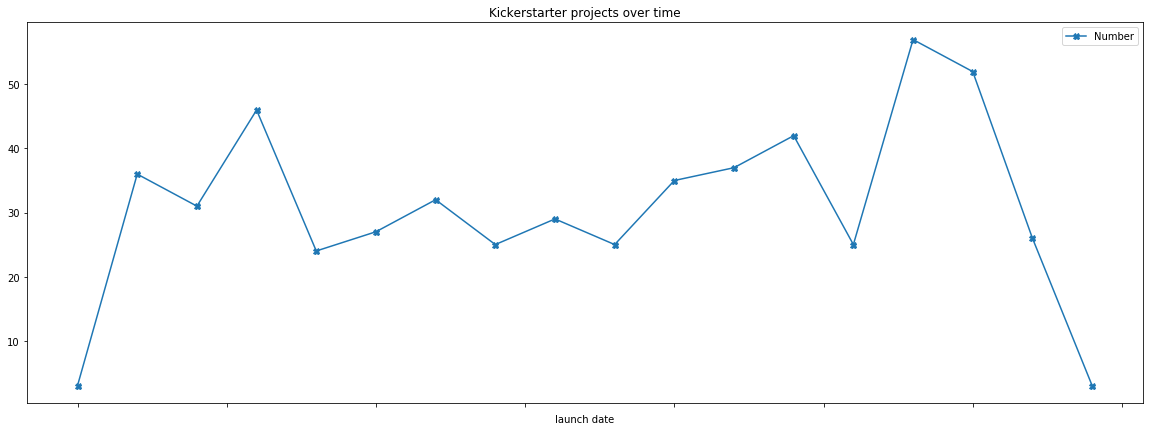

In [4]:
ks_df_time = ks_sg.groupby('launch date').size().reset_index(name='Number')
ax5 = ks_df_time.plot(kind='line',x='launch date',y='Number',figsize=(20,7),marker='X', title='Kickerstarter projects over time')

### To find out the number of successful SG projects over the years, comparing with total SG projects launched in KickStarter

It is interesting to see that the flunctuations of both projects launched and successful projects are very similar.

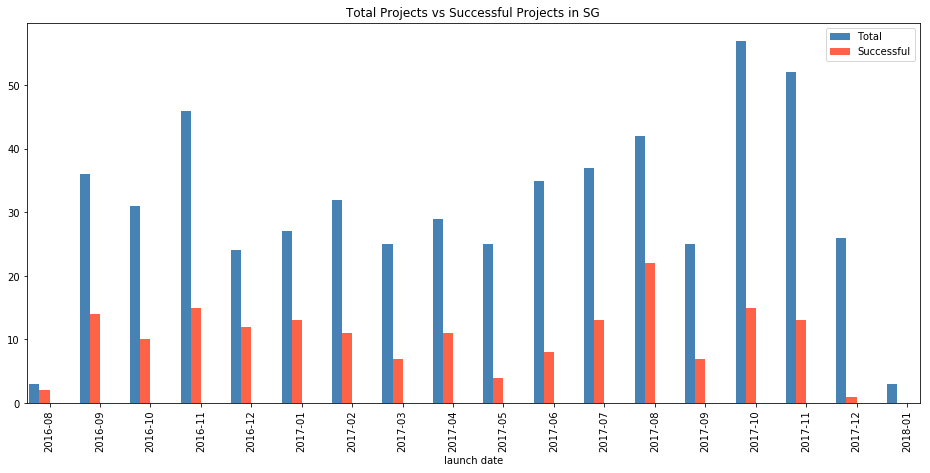

In [5]:
fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(111)

ks_sg_success=ks_sg.groupby(['launch date','state']).size().reset_index(name='No')
ks_sg_pt = pd.pivot_table(ks_sg_success, index=['launch date'], columns=['state'],
                         values ='No', aggfunc=np.sum)    #create pivot table
ks_sg_pt.fillna(0,inplace=True)    #fillna
ks_sg_pt = ks_sg_pt.astype(int)   #convert to int
ks_sg_pt.columns=pd.Index(['Canceled','Failed','Live','Successful','Suspended'])
ks_sg_pt.reset_index(inplace=True)   #flatten index

ks_sg_pt['Total'] = (ks_sg_pt['Canceled']+ks_sg_pt['Failed']+ks_sg_pt['Live']+ks_sg_pt['Successful']+ks_sg_pt['Suspended'])

ks_sg_pt.plot(kind='bar',x='launch date',y='Total',color='steelblue',
             figsize=(16,7),ax=ax,position=2,width=0.2)

ks_sg_pt.plot(kind='bar',x='launch date',y='Successful',color='tomato',
             figsize=(16,7), title='Total Projects vs Successful Projects in SG', ax=ax,position=1,width=0.2)

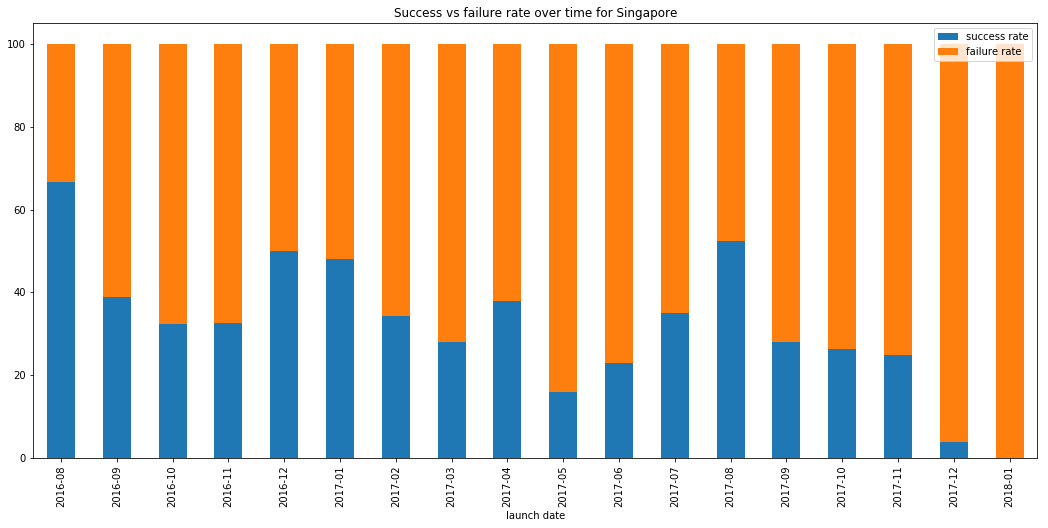

In [6]:
#stacked bar chart
figstacked = plt.figure(figsize=(18,8))
axstacked = figstacked.add_subplot(111)

ks_sg_pt['success rate'] = (ks_sg_pt['Successful']/ks_sg_pt['Total'])*100
ks_sg_pt['failure rate'] = 100-ks_sg_pt['success rate']
# ks_sg_pt_stacked[['date']]
ks_sg_pt_stacked = ks_sg_pt[['launch date','success rate','failure rate']]
ks_sg_pt_stacked.set_index('launch date', inplace=True)
ks_sg_pt_stacked.plot(kind='bar',title='Success vs failure rate over time for Singapore',
                     ax = axstacked, stacked=True)
plt.show()

##  To investigate awareness of kickstarter vs number of backers

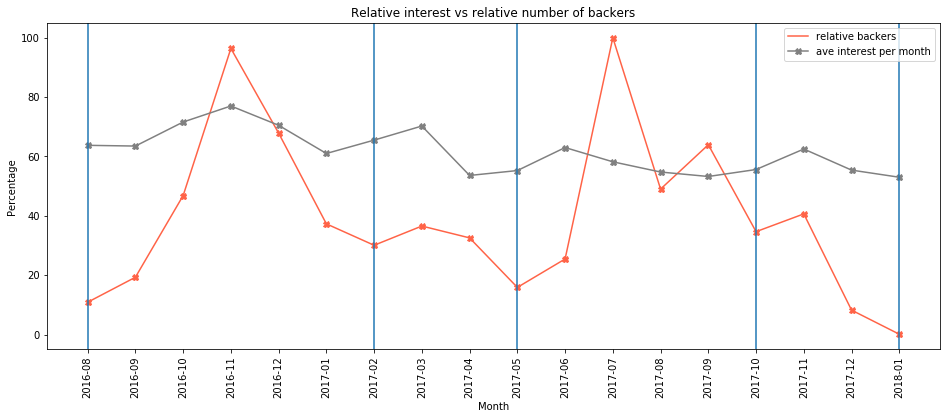

   launch date  Total number of backers  relative backers
0      2016-08                     1064         10.886024
1      2016-09                     1887         19.306323
2      2016-10                     4576         46.818089
3      2016-11                     9421         96.388377
4      2016-12                     6633         67.863720
5      2017-01                     3645         37.292818
6      2017-02                     2940         30.079804
7      2017-03                     3573         36.556169
8      2017-04                     3183         32.565991
9      2017-05                     1553         15.889094
10     2017-06                     2488         25.455290
11     2017-07                     9774        100.000000
12     2017-08                     4790         49.007571
13     2017-09                     6250         63.945161
14     2017-10                     3388         34.663393
15     2017-11                     3973         40.648660
16     2017-12

In [7]:
fig = plt.figure(figsize=(16,6))
axsg = fig.add_subplot(111)
#To plot number of backers over time in Singapore relative to the max number of backers
ks_df_backers_time = ks_sg.groupby('launch date')['backers'].sum().reset_index(name='Total number of backers')

# Represent number of backers as a percentage relative to the max number of backers a month
ks_df_backers_time['relative backers'] = (ks_df_backers_time['Total number of backers']/ks_df_backers_time['Total number of backers'].max())*100

#add data of relative interest from google trends df
ks_df_backers_time.plot(kind='line',x='launch date',y='relative backers',
                        marker='X',title='Relative interest vs relative number of backers', ax=axsg, color = 'tomato')
ks_sg_search_agg.plot(kind='line',x='Month',y='ave interest per month',
                        marker='X',ax=axsg, color = 'gray')

#setting labels and refining graph
t=list(ks_df_backers_time['launch date'])
number_of_data=ks_sg_search_agg['Month'].count()
axsg.set_xticks(np.arange(0,number_of_data,1))
axsg.set_xticklabels(t,rotation=90)
axsg.set_ylabel('Percentage')
plt.axvline(x=0)
plt.axvline(x=6)
plt.axvline(x=9)
plt.axvline(x=14)
plt.axvline(x=17)
plt.show()
print(ks_df_backers_time)

## Evaluation

### Insights: <br>
At first glance the graphs might look like they have no relation. However, upon closer inspection, there is a subtle form of correlation to be observed. If we were to split the graph into 3 portions: 
1. 2016-08 to 2017-02
2. 2017-02 to 2017-05
3. 2017-05 to 2017-10
4. 2017-10 to 2018-01 

<br>
We see a relationship between the respective peaks. <br>
For portion 1, a peak in 2016-11 for relative interest sees a corresponding peak in relative backers. <br>
Similarly for 2017-03 in portion 2, and 2017-11 in portion 4. <br>
With an exception in portion 3, where the peak in relative interest only sees a corresponding peak in relative backers the following month in 2017-17.  <br>
An interesting thing to note is some portions of the graphs have similar shapes, such as in portions 1 and 4, albeit the different extents of rise and fall in percentage. <br><br>
In conclusion,<br>
The number of backers of kickstarter projects might be mildly correlated to the awareness of kickstarter projects. A likely explanation will be that the more people that know about these kickstarter projects, the more likely for a given project to catch the attention of more people. Thus resulting in the corresponding change in number of backers. However, regardless of the possibility of this, correlation does not imply causation. Rightly so, the number of backers, amount of money raised, and subsequently the success of kickstarter projects can be subject to a myriad number of factors. Although it is hopeful to see some form of correlation in the 2 graphs, this one lone factor may barely have any effect on the overarching success rate of a kickstarter project.

### Recommendations for starting a new kickstarter project:


1) Film & Videos and Music categories are very popular and have a high success rate of getting funded. <br>
2) Have an aggrssive campaign and crowdfund the goal in less than 3 months, as projects which take more than 3 months to crowdfund generally fail

## -----------------------------------------RANDOM INSIGHTS BELOW----------------------------------------------

### To investigate the success rate vs goal set (Overall)
**1)** Eliminate outliers <br>
**2)** We split the values of goal set into bins. <br>
**3)** Group the data into their respective bins and calculate success rate for each bin <br>
**4)** Display on a bar graph

_Observe that the lower they set their crowdfunding goal, the higher the success rate_

Text(0, 0.5, 'Success Rate')

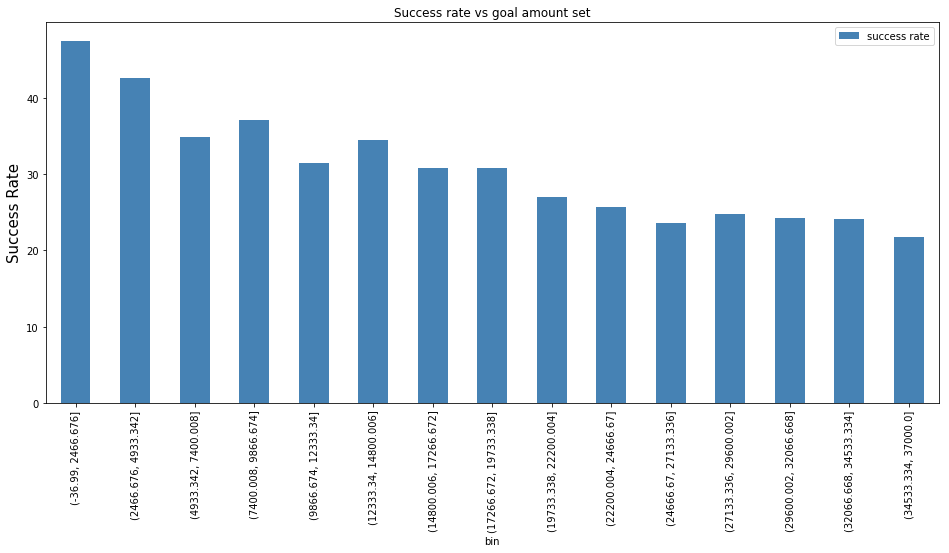

In [8]:
ks_overall_bin = ks_overall.copy()

#Univariate analysis
quartile_25 = np.percentile(ks_overall_bin['goal'],25)
quartile_75 = np.percentile(ks_overall_bin['goal'],75)
IQR = quartile_75-quartile_25

#filter out outliers
ks_overall_bin = ks_overall_bin[~(ks_overall_bin['goal']<(quartile_25-1.5*IQR)) & ~(ks_overall_bin['goal']>(quartile_75+1.5*IQR))]

#split into bins
ks_overall_bin['bin'] = pd.cut(ks_overall_bin['goal'], bins=15)

#group into bins and number of each state in each bin
ks_overall_bin_agg = ks_overall_bin.groupby(['bin','state']).size().reset_index(name='number in state')

#reorganize into pivot table and organize index
ks_overall_bin_pt = pd.pivot_table(ks_overall_bin_agg,index=['bin'],columns=['state'],values='number in state',aggfunc=np.sum)
ks_overall_bin_pt.reset_index(inplace=True)

#create column for success rate
ks_overall_bin_pt['success rate']=(ks_overall_bin_pt['successful']/(ks_overall_bin_pt['canceled']+ks_overall_bin_pt['failed']+ks_overall_bin_pt['live']+ks_overall_bin_pt['successful']+ks_overall_bin_pt['suspended']+ks_overall_bin_pt['undefined']))*100

#plot bar chart for sucess rate in each bin
ax_successbin = ks_overall_bin_pt.plot(kind='bar',x='bin',y='success rate',color='steelblue',title="Success rate vs goal amount set",
                                      figsize=(16,7))
ax_successbin.set_ylabel('Success Rate',fontsize=15)

### To investigate success rate based on country
**1)** Group data based on countries <br>
**2)** Calculate success rate for each country <br>
**3)** Bar plot

Text(0, 0.5, 'Success Rate')

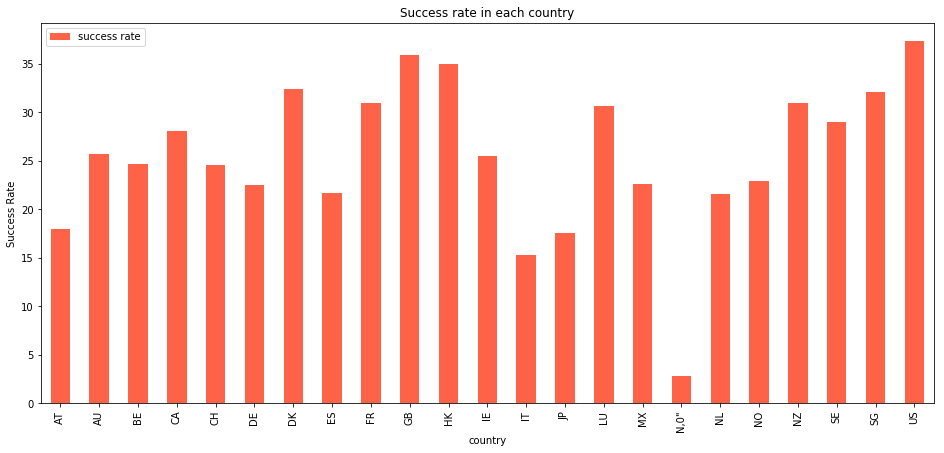

In [9]:
ks_country = ks_overall.copy()

#Group by country
ks_country = ks_country.groupby(['country','state']).size().reset_index(name='number in each state')

#Reorganize in Pivot table
ks_country_pt = pd.pivot_table(ks_country,index=['country'],columns=['state'],values='number in each state', aggfunc=np.sum)
ks_country_pt.reset_index(inplace=True)
ks_country_pt.fillna(0, inplace=True)

#Create success rate column
ks_country_pt['success rate'] = (ks_country_pt['successful']/(ks_country_pt['canceled']+ks_country_pt['failed']+ks_country_pt['live']+ks_country_pt['successful']+ks_country_pt['suspended']+ks_country_pt['undefined']))*100

#bar plot
ax_countrysuccess = ks_country_pt.plot(kind='bar',x='country',y='success rate', title='Success rate in each country', 
                                      color = 'tomato', figsize=(16,7))
ax_countrysuccess.set_ylabel('Success Rate')


### To investigate success rate vs duration of crowdfunding


Text(0.5, 1.0, 'Success Rate vs Duration of Crowdfunding')

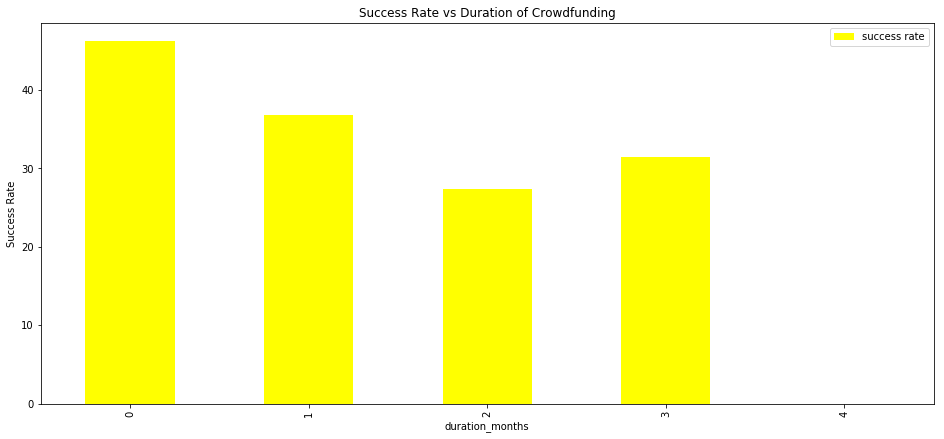

In [25]:
ks_duration = ks_overall.copy()

#calculate duration of each crowdfunding
ks_duration['duration_months']=(ks_duration['deadline year']-ks_duration['launch year'])*12+ks_duration['deadline month']-ks_duration['launch month']


#groupby duration and states
ks_duration_agg = ks_duration.groupby(['duration_months','state']).size().reset_index(name='Number in state')

#Reorganize in pivot table
ks_duration_pt = pd.pivot_table(ks_duration_agg,index=['duration_months'],columns=['state'],values='Number in state',aggfunc=np.sum)
ks_duration_pt.reset_index(inplace=True)

#obtain column of success rates
ks_duration_pt['success rate']=(ks_duration_pt['successful']/(ks_duration_pt['canceled']+ks_duration_pt['failed']+ks_duration_pt['live']+ks_duration_pt['successful']+ks_duration_pt['suspended']))*100
ks_duration_pt = ks_duration_pt[ks_duration_pt['duration_months']<50] 

#Plot graph of success rate vs duration
ax_durationsuccess = ks_duration_pt.plot(kind='bar',x='duration_months',y='success rate',figsize=(16,7),color='yellow')
ax_durationsuccess.set_ylabel('Success Rate')
ax_durationsuccess.set_title("Success Rate vs Duration of Crowdfunding")

### Percentage of projects in each category vs their success rates

Text(0.5, 1.0, 'Percentage of total in category & Success Rate (SINGAPORE)')

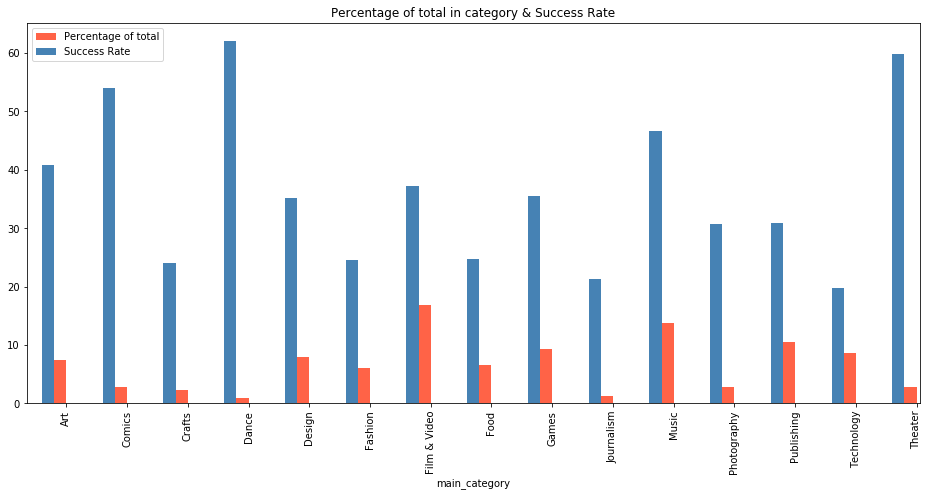

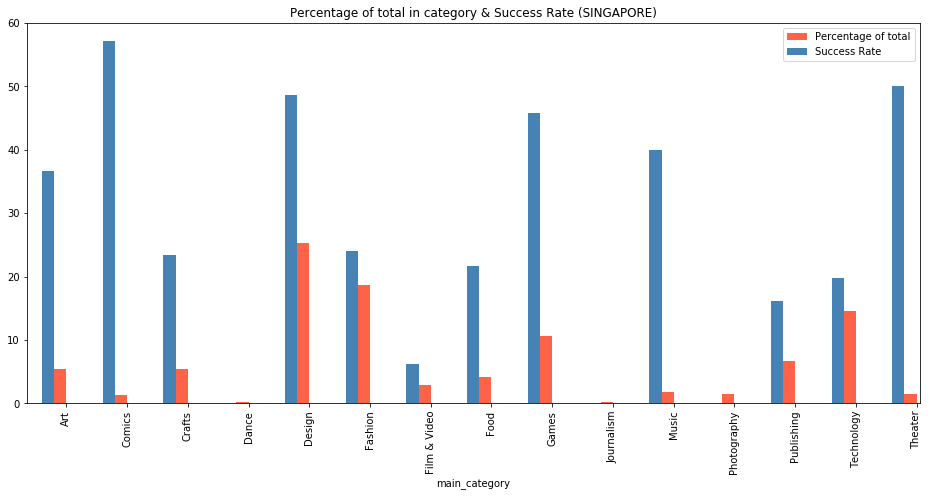

In [11]:
#To plot percentage of each category vs success rates
#TOTAL
fig = plt.figure(figsize=(16,7))
ax3=fig.add_subplot(111)

ks_df2=ks_df.copy()

#get total number of projects
ks_df2_maincat = ks_df2.groupby('main_category').size().reset_index(name='Number in category')
total = ks_df2_maincat['Number in category'].sum()

#Calculate percentage of category out of total
ks_df2_maincat['Percentage of total'] = (ks_df2_maincat['Number in category']/total)*100 
ks_df2_maincat.plot(kind='bar',x='main_category',y='Percentage of total',ax=ax3,color = 'tomato',position=1,width=0.2)

#Group by their main cateogry and get number in each state, then reorgnize in pivot table
ks_df2_maincat_success = ks_df2.groupby(['main_category','state']).size().reset_index(name='Number')
ks_df2_maincat_success_pt = pd.pivot_table(ks_df2_maincat_success, index=['main_category'],columns=['state'],
                                          values='Number',aggfunc=np.sum) 

#Flatten index
ks_df2_maincat_success_pt.columns=pd.Index(['Canceled','Failed','Live','Successful','Suspended','Undefined'])
ks_df2_maincat_success_pt.reset_index(inplace=True)
ks_df2_maincat_success_pt.fillna(0,inplace=True)

#Get success rate
ks_df2_maincat_success_pt['Success Rate']=(ks_df2_maincat_success_pt['Successful']/(ks_df2_maincat_success_pt['Canceled']+ks_df2_maincat_success_pt['Failed']+ks_df2_maincat_success_pt['Live']+ks_df2_maincat_success_pt['Successful']+ks_df2_maincat_success_pt['Suspended']+ks_df2_maincat_success_pt['Undefined']))*100

#Plot bar graph
ks_df2_maincat_success_pt.plot(kind='bar',x='main_category',y='Success Rate', ax=ax3,color='steelblue',position=2, width=0.2)

ax3.set_title('Percentage of total in category & Success Rate')

###############################################################################################################################

#SINGAPORE
fig = plt.figure(figsize=(16,7))
ax4=fig.add_subplot(111)

ks_sg2 = ks_sg.copy()

#get total number of projects
ks_sg2_maincat = ks_sg2.groupby('main_category').size().reset_index(name='Number in category')
total = ks_sg2_maincat['Number in category'].sum()

#Calculate percentage of category out of total
ks_sg2_maincat['Percentage of total'] = (ks_sg2_maincat['Number in category']/total)*100 
ks_sg2_maincat.plot(kind='bar',x='main_category',y='Percentage of total',ax=ax4,color = 'tomato',position=1,width=0.2)

#Group by their main cateogry and get number in each state, then reorgnize in pivot table
ks_sg2_maincat_success = ks_sg2.groupby(['main_category','state']).size().reset_index(name='Number')
ks_sg2_maincat_success_pt = pd.pivot_table(ks_sg2_maincat_success, index=['main_category'],columns=['state'],
                                          values='Number',aggfunc=np.sum)  

#Flatten index
ks_sg2_maincat_success_pt.columns=pd.Index(['Canceled','Failed','Live','Successful','Suspended'])
ks_sg2_maincat_success_pt.reset_index(inplace=True)
ks_sg2_maincat_success_pt.fillna(0,inplace=True)

#Get success rate
ks_sg2_maincat_success_pt['Success Rate']=(ks_sg2_maincat_success_pt['Successful']/(ks_sg2_maincat_success_pt['Canceled']+ks_sg2_maincat_success_pt['Failed']+ks_sg2_maincat_success_pt['Live']+ks_sg2_maincat_success_pt['Successful']+ks_sg2_maincat_success_pt['Suspended']))*100

#Plot bar graph
ks_sg2_maincat_success_pt.plot(kind='bar',x='main_category',y='Success Rate', ax=ax4,color='steelblue',position=2, width=0.2)
ax4.set_title('Percentage of total in category & Success Rate (SINGAPORE)')